Question 1

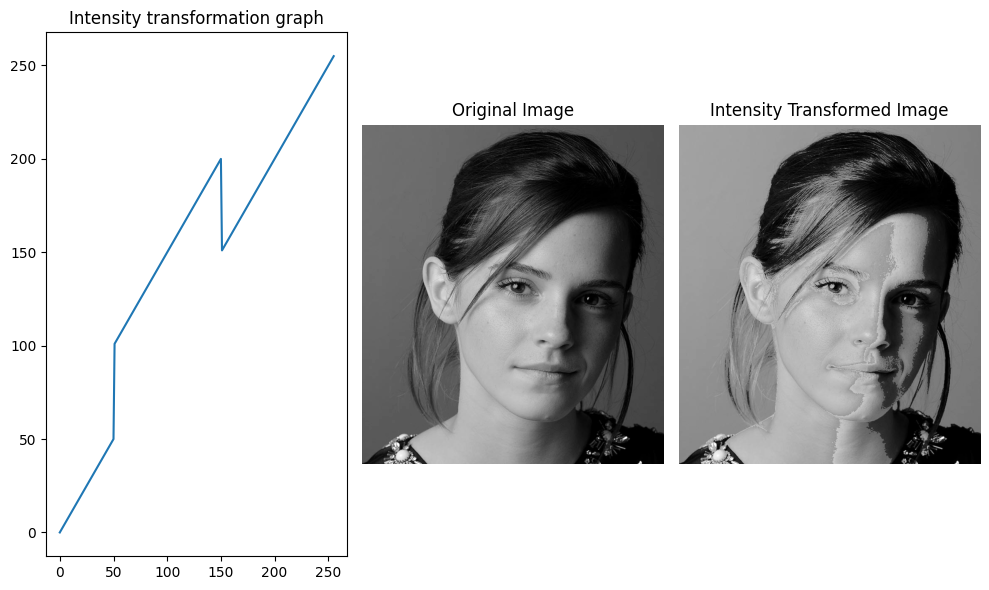

In [ ]:
#Q1
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
f = cv.imread("/content/emma.jpg", cv.IMREAD_GRAYSCALE)
assert f is not None

# Apply intensity transformation using numpy's vectorized operations
t1 = np.arange(0, 51)
t2 = np.arange(101, 201)
t3 = np.arange(151, 256)

trsfm = np.concatenate((t1, t2, t3), axis=0).clip(0, 255).astype('uint8')
g = trsfm[f]

# Display original and transformed images using matplotlib
fig, ax = plt.subplots(1, 3, figsize=(10, 6))
ax[0].plot(trsfm), ax[0].set_title("Intensity transformation graph")
ax[1].imshow(f, cmap='gray'), ax[1].axis('off'), ax[1].set_title("Original Image")
ax[2].imshow(g, cmap='gray'), ax[2].axis('off'), ax[2].set_title("Intensity Transformed Image")
plt.tight_layout()
plt.show()


Question 2

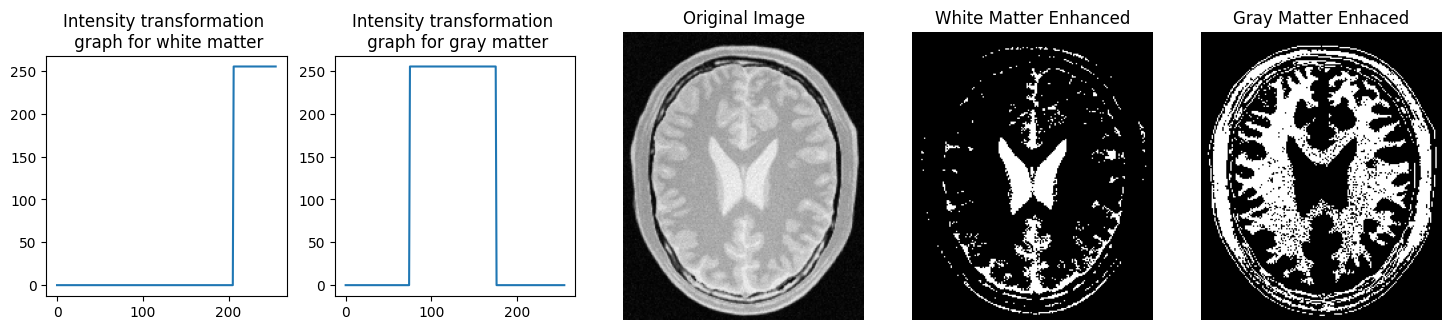

In [ ]:
#Q2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("BrainProtonDensitySlice9.png",cv.IMREAD_GRAYSCALE)
assert img is not None

a1 = np.linspace(0,0,206).astype('uint8')
a2= np.linspace(255,255,50).astype('uint8')
a3 = np.linspace(0,0,70).astype('uint8')
a4 = np.linspace(255,255,101).astype('uint8')
a5 = np.linspace(0,0,85).astype('uint8')

white_m_enhanced = np.concatenate((a1,a2),axis=0).astype('uint8')
gray_m_enhanced = np.concatenate((a3,a4,a5),axis=0).astype('uint8')

img_2= cv.LUT(f,white_m_enhanced)
img_3= cv.LUT(f,gray_m_enhanced)

fig, ax = plt.subplots(1,5,figsize=(18,18))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity transformation \n graph for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity transformation \n graph for gray matter")
ax[2].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[2].axis('off'), ax[2].set_title("Original Image")
ax[3].imshow(cv.cvtColor(img_2,cv.COLOR_BGR2RGB)), ax[3].axis('off'), ax[3].set_title("White Matter Enhanced")
ax[4].imshow(cv.cvtColor(img_3,cv.COLOR_BGR2RGB)), ax[4].axis('off'), ax[4].set_title("Gray Matter Enhaced")
plt.show()

Question 3

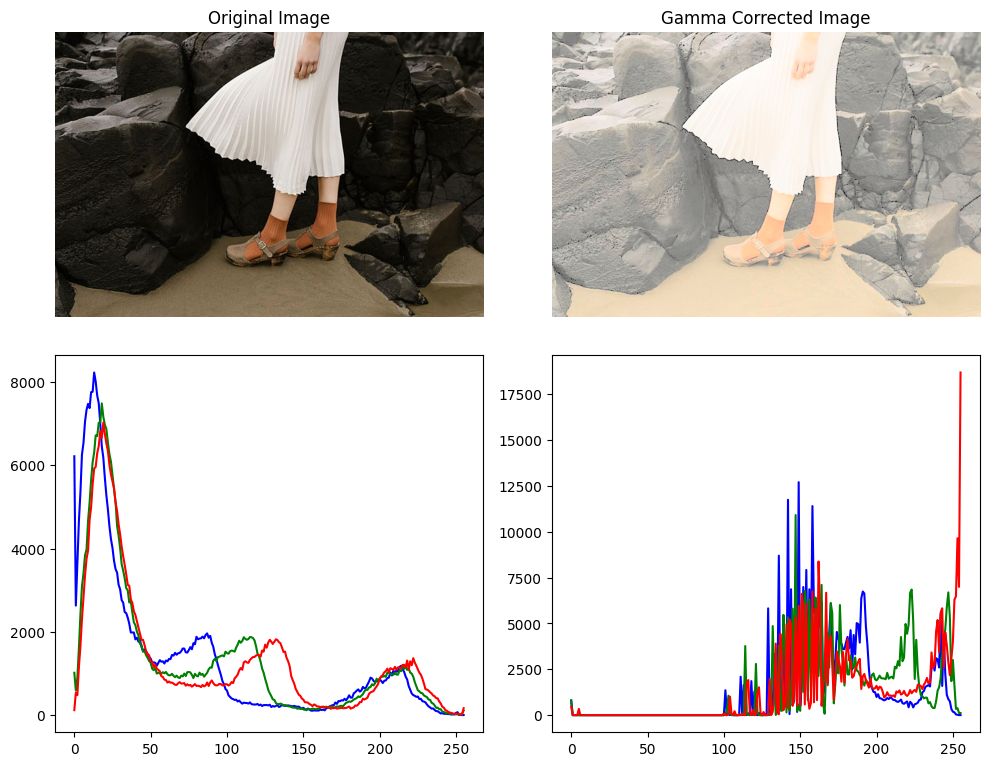

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load the input image
input_image = cv2.imread('highlights_and_shadows.jpg', cv2.IMREAD_COLOR)

# Set the gamma value
gamma_value = 1

# Convert BGR image to Lab color space
lab_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2Lab)

# Split the Lab image into channels
L_channel, a_channel, b_channel = cv2.split(lab_image)

# Calculate gamma correction lookup table
gamma_table = np.array([(i / 255.0) ** (gamma_value) * 255.0 for i in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction to the L channel
corrected_L_channel = cv2.LUT(L_channel, gamma_table)

# Merge the corrected L channel with a and b channels
corrected_lab_image = cv2.merge((corrected_L_channel, a_channel, b_channel))

# Convert corrected Lab image back to BGR color space
gamma_corrected_image = cv2.cvtColor(corrected_lab_image, cv2.COLOR_Lab2BGR)

# Create subplots for displaying images and histograms
fig, axarr = plt.subplots(2, 2, figsize=(10, 8))

# Display the original image
axarr[0, 0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
axarr[0, 0].set_title('Original Image')
axarr[0, 0].axis('off')

# Display the gamma-corrected image
axarr[0, 1].imshow(cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB))
axarr[0, 1].set_title('Gamma Corrected Image')
axarr[0, 1].axis('off')

# Plot histograms for original and gamma-corrected images
colors = ('b', 'g', 'r')
for i, c in enumerate(colors):
    hist_input = cv2.calcHist([input_image], [i], None, [256], [0, 256])
    axarr[1, 0].plot(hist_input, color=c)
    hist_corrected = cv2.calcHist([gamma_corrected_image], [i], None, [256], [0, 256])
    axarr[1, 1].plot(hist_corrected, color=c)

# Display the subplots
plt.tight_layout()
plt.show()


Question 4

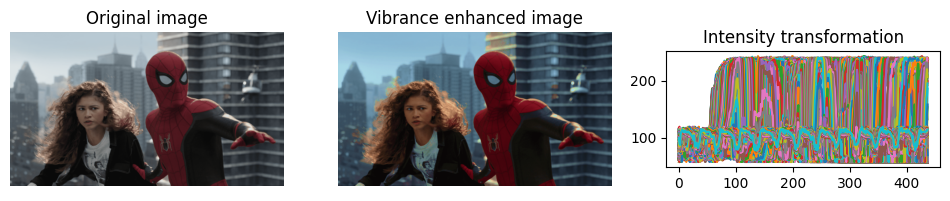

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/spider.png',cv2.IMREAD_COLOR)

# Convert image from RGB to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split image into hue, saturation, and value planes #(a)
h, s, v = cv2.split(hsv)

# Apply intensity transformation to saturation plane  #(b) & (c)
a = 0.45 # adjust this value to get a visually pleasing output
s = np.minimum(s + a*128*np.exp(-(s-128)**2/(2*70**2)), 255).astype(np.uint8)

# Recombine the three planes #(d)
hsv = cv2.merge((h, s, v))

# Convert image back to RGB color space
result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


# Plot original and transformed images #(e)
fig, ax = plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB)), ax[0].axis('off'), ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(result,cv.COLOR_BGR2RGB)), ax[1].axis('off'), ax[1].set_title("Vibrance enhanced image")
##ax[2].imshow(s), ax[2].axis('off'), ax[2].set_title("Intensity transformation")
ax[2].plot(s), ax[2].set_title("Intensity transformation"), ax[2].set_aspect('equal')
plt.show()


Question 5

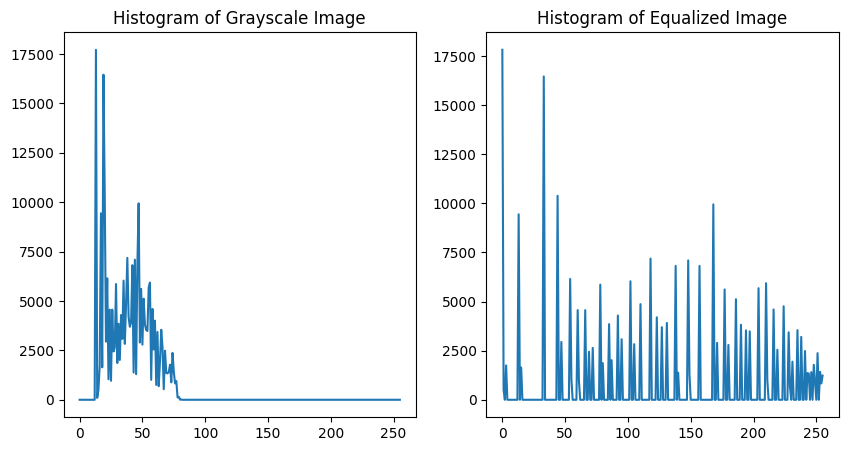

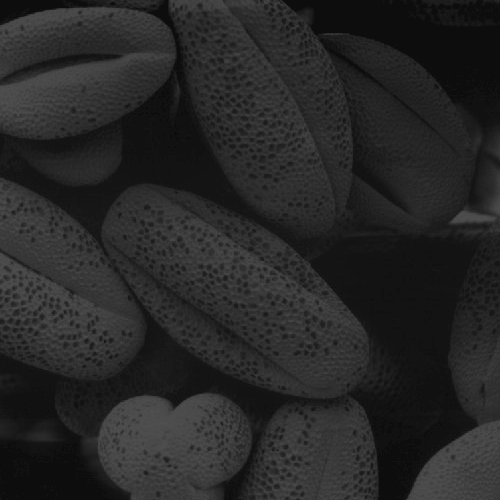

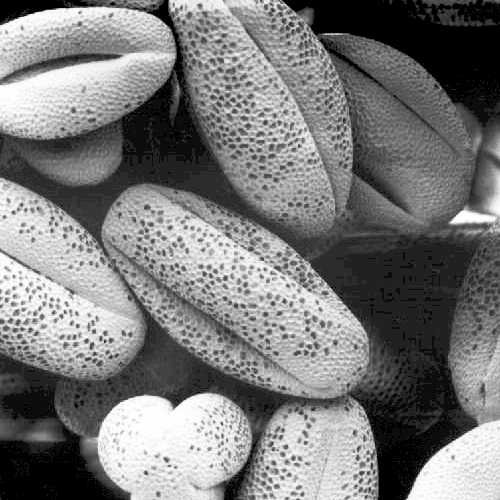

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
img = cv.imread('shells.tif',cv.IMREAD_GRAYSCALE)

#equalized image
equalized_img = cv.equalizeHist(img)

def plot_histograms(img):
      # Calculate the histograms of the grayscale image and the equalized image
    hist_img = cv.calcHist([img], [0], None, [256], [0, 256])
    equ = cv.equalizeHist(img)
    hist_equ = cv.calcHist([equ], [0], None, [256], [0, 256])

    # Plot the histograms side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(hist_img), axs[0].set_title('Histogram of Grayscale Image')
    axs[1].plot(hist_equ),axs[1].set_title('Histogram of Equalized Image')
    plt.show()
# Display the histograms before and after equalization
plot_histograms(img)

cv2_imshow( img)
cv2_imshow( equalized_img )
cv.waitKey(0)
cv.destroyAllWindows()

Question 6

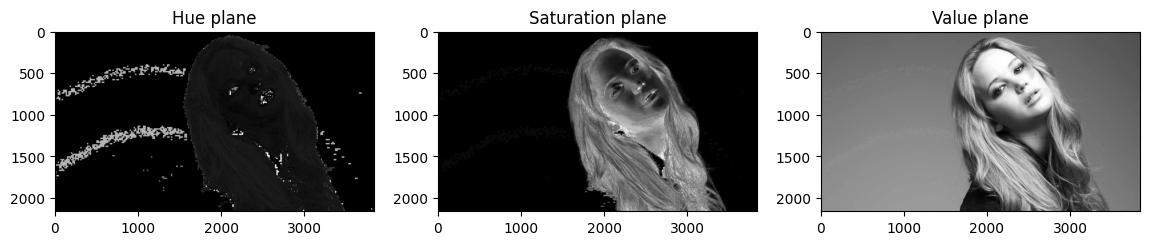

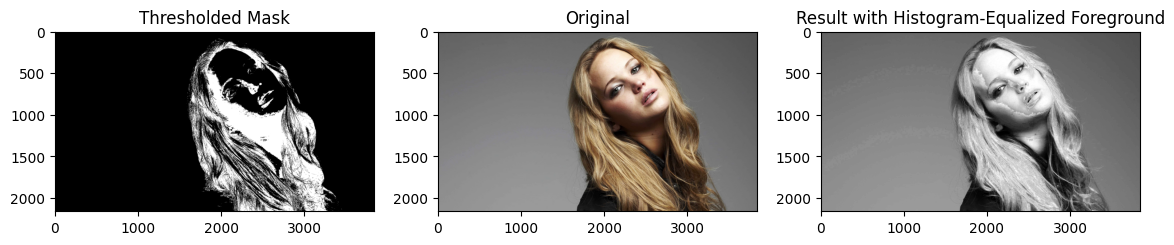

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img = cv.imread('jeniffer.jpg')

# (a)
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, sat, val = cv.split(hsv)

fig, ax = plt.subplots(1, 3, figsize=(14, 14))
ax[0].imshow(hue, cmap='gray'),ax[0].set_title("Hue plane")
ax[1].imshow(sat, cmap='gray'),ax[1].set_title("Saturation plane")
ax[2].imshow(val, cmap='gray'),ax[2].set_title("Value plane")
plt.show()

# (b) using the saturation (s) plane for thresholding
_, thresholded_mask = cv.threshold(sat, 110, 255, cv.THRESH_BINARY)

# (c)
foreground = cv.bitwise_and(val, thresholded_mask)

# (d)
hist_foreground = cv.calcHist([foreground], [0], thresholded_mask, [256], [0, 256])
cumulative_hist = np.cumsum(hist_foreground)

# (e)
equalized_foreground = cv.equalizeHist(foreground)

# (f)
background = cv.bitwise_not(thresholded_mask)
background_image = cv.bitwise_and(val, background)

# Add the equalized foreground with the background
result_value = cv.add(equalized_foreground, background_image)

# Display results
fig, ax = plt.subplots(1, 3, figsize=(14, 14))
ax[0].imshow(thresholded_mask, cmap='gray')
ax[0].set_title("Thresholded Mask")
ax[1].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].set_title("Original")

ax[2].imshow(result_value, cmap='gray')
ax[2].set_title("Result with Histogram-Equalized Foreground")
plt.show()



Question 7

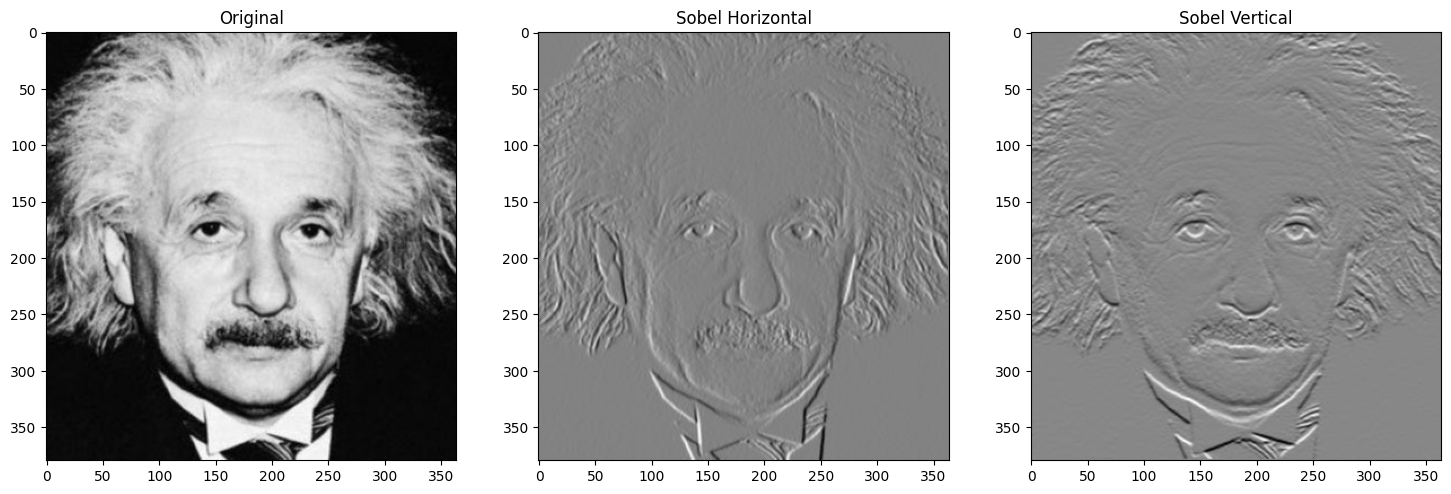

In [ ]:
#Q7(a)
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
# Sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float32')
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float32')

# Apply Sobel kernels using filter2D
img_sobel_h = cv.filter2D(img, -1, sobel_kernel_x)
img_sobel_v = cv.filter2D(img, -1, sobel_kernel_y)

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(18, 9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(img_sobel_h, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[2].imshow(img_sobel_v, cmap='gray')
axes[2].set_title('Sobel Vertical')
plt.show()



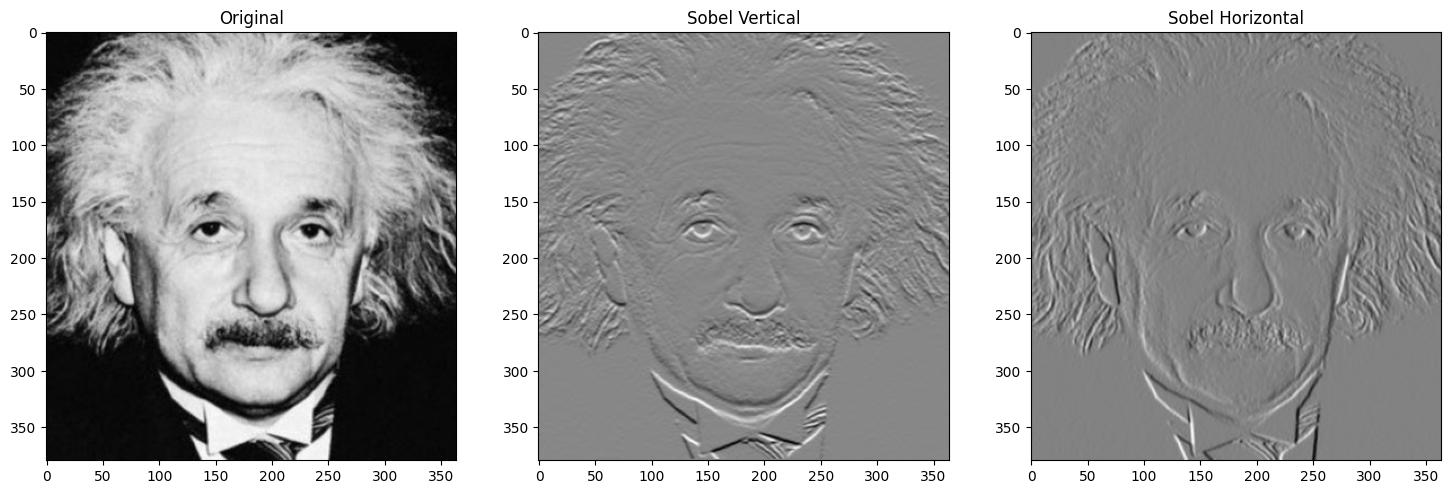

In [ ]:
#Q7(b)
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

# Sobel vertical edge detection
img_sobel_v = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

# Sobel horizontal edge detection
img_sobel_h = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)

fig, axes = plt.subplots(1, 3, figsize=(18, 9))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(img_sobel_v, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[2].imshow(img_sobel_h, cmap='gray')
axes[2].set_title('Sobel Horizontal')
plt.show()


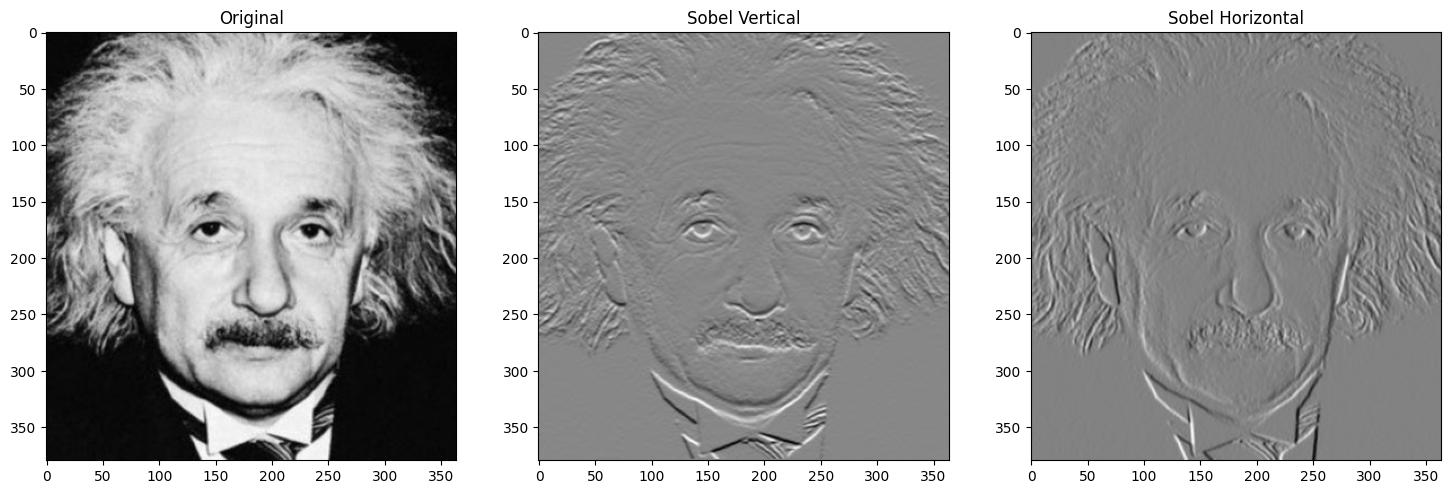

In [ ]:
#Q7 (c)
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE).astype(np.float32)

k_hor = np.array([1,2,1], dtype=np.float32)
k_ver = np.array([1,0,-1], dtype=np.float32)
img_sobel_ver = cv.sepFilter2D(img, -1, k_hor, k_ver)
img_sobel_hor = cv.sepFilter2D(img, -1, k_ver, k_hor)

fig, ax  = plt.subplots(1, 3, figsize=(18,9))
ax[0].imshow(img, cmap='gray'), ax[0].set_title('Original')
ax[1].imshow(img_sobel_v, cmap='gray'), ax[1].set_title('Sobel Vertical')
ax[2].imshow(img_sobel_h, cmap='gray'), ax[2].set_title('Sobel Horizontal')
plt.show()


Question 8

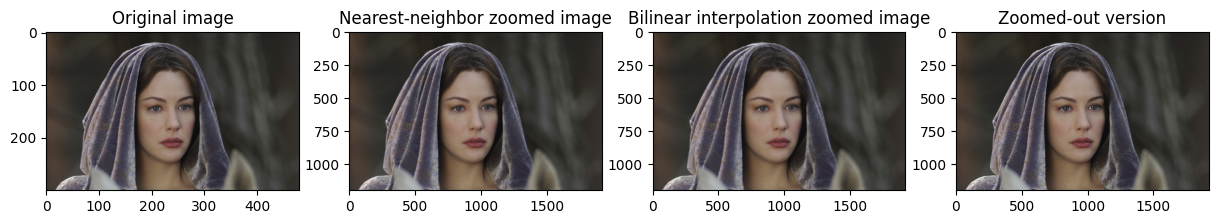

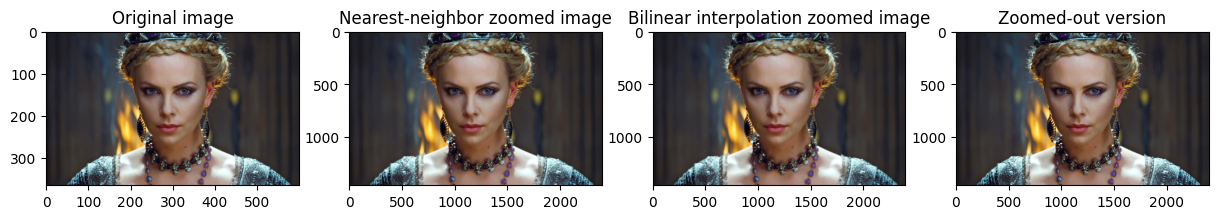

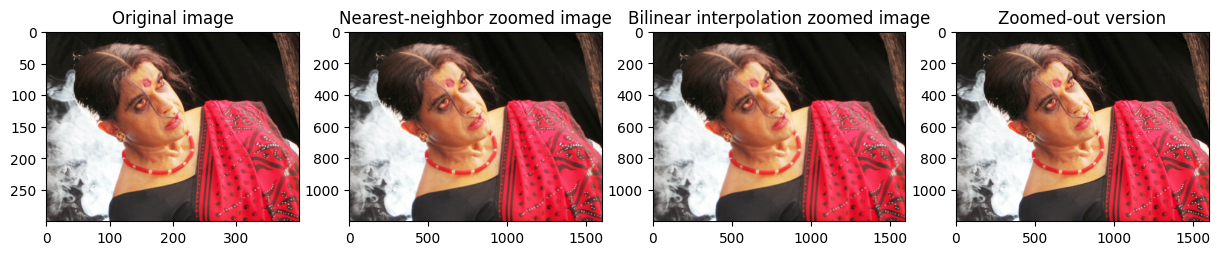

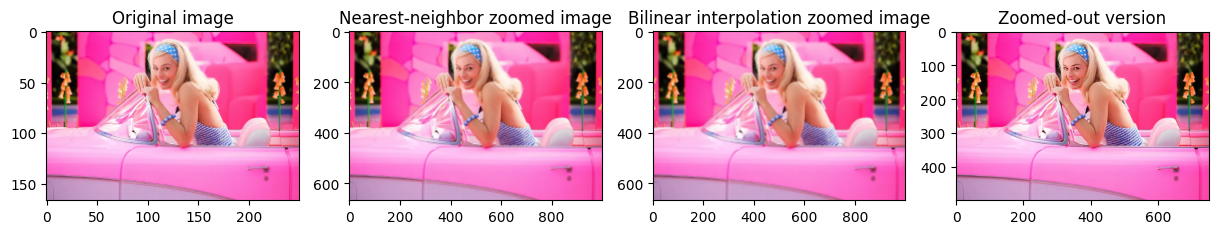

In [ ]:
#Q8
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

original_images = ["im02small.png", "im03small.png", "im09small.png","im11small.png"]
zoom_outs = ["im02.png", "im03.png", "im09.png", "im11.png"]

def images_set():
 for j in range(4):
    image = cv.imread(original_images[j])
    image_zoom_out = cv.imread(zoom_outs[j])

    image_bilinear = cv.resize(image, None, fx=4, fy=4, interpolation=cv.INTER_LINEAR)
    image_near = cv.resize(image, None, fx=4, fy=4, interpolation=cv.INTER_NEAREST)

    fig, ax = plt.subplots(1,4, figsize=(15,15))
    ax[0].imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB)), ax[0].set_title("Original image")
    ax[1].imshow(cv.cvtColor(image_near,cv.COLOR_BGR2RGB)), ax[1].set_title("Nearest-neighbor zoomed image")
    ax[2].imshow(cv.cvtColor(image_bilinear,cv.COLOR_BGR2RGB)), ax[2].set_title("Bilinear interpolation zoomed image")
    ax[3].imshow(cv.cvtColor(image_zoom_out ,cv.COLOR_BGR2RGB)), ax[3].set_title("Zoomed-out version")
    plt.show()

images_set()


Question 9

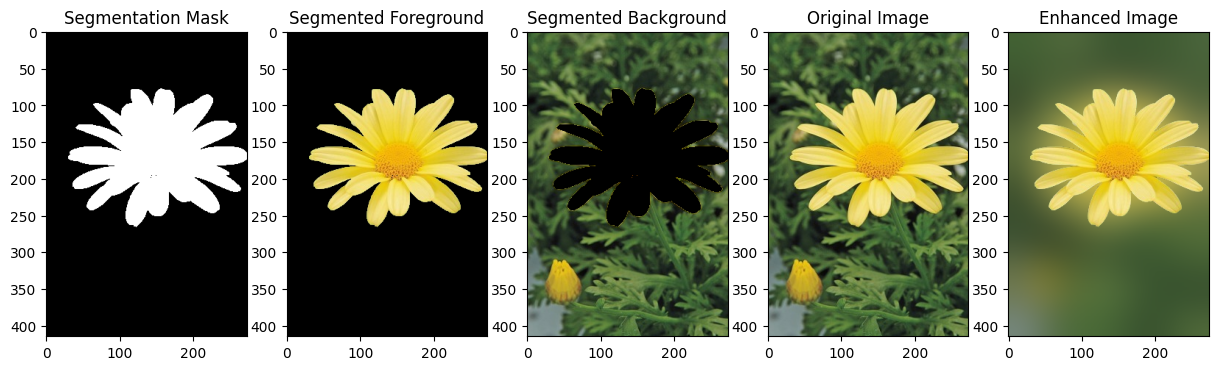

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
input_image = cv.imread('flower.jpg')
# (a)
segmentation_mask = np.zeros(input_image.shape[:2], dtype=np.uint8)

# Define a region of interest (ROI) within the image
roi_rect = (30, 30, input_image.shape[1] - 30, input_image.shape[0] - 150)
bg_model = np.zeros((1, 65), dtype=np.float64)# Initialize arrays for background and foreground models
fg_model = np.zeros((1, 65), dtype=np.float64)
cv.grabCut(input_image, segmentation_mask, roi_rect, bg_model, fg_model, 5, cv.GC_INIT_WITH_RECT)
# Create a binary mask where 1 represents the foreground and 0 represents the background
binary_mask = np.where((segmentation_mask == 2) | (segmentation_mask == 0), 0, 1).astype('uint8')
# Apply the mask to the original image to extract the segmented foreground
segmented_image = input_image * binary_mask[:, :, np.newaxis]

# Create subplots for visualization
fig, ax = plt.subplots(1, 5, figsize=(15, 15))
ax[0].imshow(binary_mask, cmap='gray'),ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB)),ax[1].set_title('Segmented Foreground')
ax[2].imshow(cv.cvtColor(input_image - segmented_image, cv.COLOR_BGR2RGB)),ax[2].set_title('Segmented Background')

# (b) Enhance the image
blurred_background = cv.GaussianBlur(input_image, (0, 0), 30)
enhanced_image = np.where(binary_mask[:, :, np.newaxis] == 1, input_image, blurred_background)

ax[3].imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB)),ax[3].set_title('Original Image')
ax[4].imshow(cv.cvtColor(enhanced_image, cv.COLOR_BGR2RGB)),ax[4].set_title('Enhanced Image')

plt.show()
